In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd
from pandas import DataFrame
import os
from sklearn import svm
from tqdm._tqdm_notebook import tqdm_notebook

## Data Preparation

In [8]:
# Import landmarks
import lab2_landmarks as l2

def get_data_A2():
# Target Index from lab2_landmarks: 2 (Gender_label), 3 (Emotion_label)
    return l2.extract_features_labels(3)


# x: feature, y: label
x, y = get_data_A2()

In [9]:
def split_data_A2(x, y):

    # Transpose of y
    yT = np.array([y, -(y - 1)]).T

    # Train-test split
    #x, yT = shuffle (x, yT, random_state=0)
    x_tr, x_te, y_tr, y_te = train_test_split(x, yT, train_size = 0.8, random_state=0)
    
    return x, yT, x_tr, x_te, y_tr, y_te

x, yT, x_tr, x_te, y_tr, y_te = split_data_A2(x,y)

In [10]:

# Data reshaping
def reshapeX_A2(x):
    return x.reshape((x.shape[0], x.shape[1] * x.shape[2]))

def reshapeY_A2(y):
    return list(zip(*y))[0]

def prepare_data_A2(x_tr, x_te, y_tr, y_te):
    # Generate and reshape the train and test dataset 
    train_images = reshapeX_A2(x_tr)
    test_images = reshapeX_A2(x_te)
    train_labels = reshapeY_A2(y_tr)
    test_labels = reshapeY_A2(y_te)
    
    return train_images, test_images, train_labels, test_labels 

train_images, test_images, train_labels, test_labels = prepare_data_A2(x_tr, x_te, y_tr, y_te)


## New Dataset Generation

In [2]:
## Import new landmarks for new test dataset
import lab2_landmarks_test as l2_test
#from lab2_landmarks_test import *


Using TensorFlow backend.


In [3]:
def load_test_data_A2():
    # l2.extract_features_labels(Target Index)
    
    # Target Index from lab2_landmarks: 
    #         2 (Gender_label), 3 (Emotion_label)

    return l2_test.extract_features_labels_test(3)




In [4]:
# a: feature, b: label
a, b = load_test_data_A2()

In [11]:
def newdata_prep_A2(x,y):
    yT = np.array([y, -(y - 1)]).T
    images = reshapeX_A2(x)
    labels = reshapeY_A2(yT)
    return images, labels

new_image, new_label = newdata_prep_A2(a,b)

## SVM Model Training using RandomSearchCV

In [12]:
# Define the range of hyperparamter

def param_rs_linear_A2():
    
    param = {'C': stats.uniform(0.1, 10),
             'kernel': ['linear']}

    return param

def param_rs_rbf_A2():
    
    param = {'C': stats.uniform(0.1, 10),
             'gamma': stats.uniform(0.001, 0.01),
             'kernel': ['rbf']}

    return param

def param_rs_poly_A2():
    
    param = {'C': stats.uniform(0.01, 10),
             'degree': stats.uniform(1, 4),
             'kernel': ['poly']}

    return param



In [13]:
param_rs_linear = param_rs_linear_A2()
param_rs_rbf = param_rs_rbf_A2()
param_rs_poly = param_rs_poly_A2()

In [14]:
def randomSearch_A2(X, y, param_kernel):
    param_distributions = param_kernel #a dictionary with parameters names (string) as keys of parameters to try
    #number of jobs = -1 is using all processors 
    #n_iter trades off runtime with quality of solution
    #cv is at default value for 5-fold cross validation
    #verbose gives out messages; refit is to refit an estimator to find the best parameters
    #random_state is a pseudo random number generator used for random uniform sampling from list of possible values instead of using scipy.stats distributions
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
    searchrand.cv_results_

    return searchrand.best_params_, searchrand.best_estimator_ 
    

In [15]:
# Obtaining optimum hyperparameters and classifier for different kernel
rs_linear_param, rs_linear = randomSearch_A2(train_images, train_labels, param_rs_linear)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 90.5min finished


In [16]:
rs_rbf_param, rs_rbf= randomSearch_A2(train_images, train_labels, param_rs_rbf)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [17]:
rs_poly_param, rs_poly = randomSearch_A2(train_images, train_labels, param_rs_poly)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [18]:
# Display optimum hyperparameters for SVC kernel
print('\nOptimal  hyper-parameters and accuracy score (Kernel: Linear):')
print(rs_linear_param)
print(rs_linear.score(test_images, test_labels))

print('\nOptimal  hyper-parameters and accuracy score (Kernel: RBF):')
print(rs_rbf_param)
print(rs_rbf.score(test_images, test_labels))

print('\nOptimal  hyper-parametersand accuracy score (Kernel: Polynomial):')
print(rs_poly_param)
print(rs_poly.score(test_images, test_labels))


Optimal  hyper-parameters and accuracy score (Kernel: Linear):
{'C': 9.818136480193424, 'kernel': 'linear'}
0.8925964546402503

Optimal  hyper-parameters and accuracy score (Kernel: RBF):
{'C': 2.934876855072576, 'gamma': 0.0024074255468270935, 'kernel': 'rbf'}
0.8696558915537018

Optimal  hyper-parametersand accuracy score (Kernel: Polynomial):
{'C': 9.083379467664232, 'degree': 4.348662659877247, 'kernel': 'poly'}
0.8884254431699687


In [19]:
print(rs_linear.score(test_images, test_labels))
print(rs_rbf.score(test_images, test_labels))
print(rs_poly.score(test_images, test_labels))

0.8925964546402503
0.8696558915537018
0.8884254431699687


## Model Prediction

In [21]:
def prediction_A2(best_estimator):
    clf = best_estimator
    pred = clf.predict(test_images)
    return pred

In [22]:
pred_linear = prediction_A2(rs_linear)

In [23]:
pred_rbf = prediction_A2(rs_rbf)

In [24]:
pred_poly = prediction_A2(rs_poly)

## Model Validation - Learning Curve

In [25]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                                          cv=cv, n_jobs=n_jobs,
                                                                          train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    
    return plt

Running at 2020-01-13 15:33:30.442719


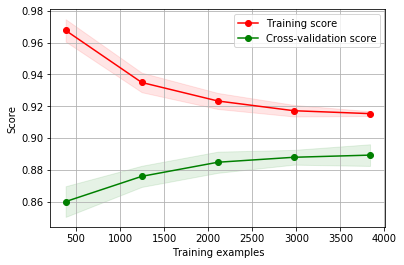

In [26]:
from datetime import datetime

print('Running at', str(datetime.now()))

fig, axes = plt.subplots(1, 1)

X = reshapeX_A2(x)
y = reshapeY_A2(yT)

#final_clf_lin = SVC(C= 0.1, gamma = 0.001, kernel = 'linear')
#final_clf_rbf = SVC(C= 10, gamma = 0.001, kernel='rbf')
final_clf_poly = SVC(C=1.8164606191927957, degree = 4.271250592417447, kernel='poly')


#{'C': 1.8164606191927957, 'degree': 4.271250592417447, 'kernel': 'poly'}
estimator = final_clf_poly

title = 'Learning Curves (Kernel = Linear)'
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

plt = plot_learning_curve(estimator, title, X, y, axes = axes, cv = cv, n_jobs = -1)
    
plt.show()
 

## Model Validation: Confusion Matrix

Confusion matrix, without normalization
[[426  38]
 [ 69 426]]
Normalized confusion matrix
[[0.92 0.08]
 [0.14 0.86]]


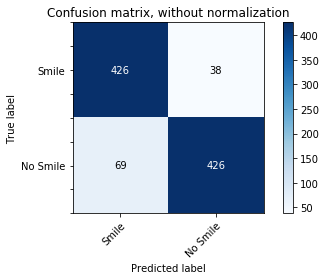

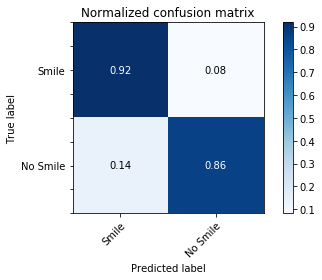

In [27]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


class_names = np.array(['Smile', 'No Smile'])
clf = rs_poly
pred = clf.predict(test_images)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix

    cm = confusion_matrix(test_labels, pred)
    # Define the name of x and y axis
    classes = class_names
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation=None, cmap=cmap)
    
    print(cm)
    ax.figure.colorbar(im, ax=ax)

    for i in range(len(ax.yaxis.get_major_ticks())):
        ax.yaxis.get_major_ticks()[i].label1.set_visible(False)
        
    for i in [2, 6]:
        ax.yaxis.get_major_ticks()[i].label1.set_visible(True)

        
    ax.set(
        xticks = np.arange(cm.shape[1]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=[0, 0, classes[0], 0, 0, 0, classes[1], 0, 0],
       title=title,
       ylabel='True label',
       xlabel='Predicted label'
    )
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(test_images, pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_images, pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Accuracy score with three different kernels

In [28]:
# Print out each kernel functions with accuracy scores
acc_scores = {'Types of Kernel' : ['Linear','RBF','Polynomial'],
           'Accuracy Score' : [rs_linear.score(test_images, test_labels), rs_rbf.score(test_images, test_labels), rs_poly.score(test_images, test_labels)]}

df_kernel_scores = DataFrame(acc_scores, columns= ['Types of Kernel', 'Accuracy Score'])
print(df_kernel_scores)


  Types of Kernel  Accuracy Score
0          Linear        0.892596
1             RBF        0.869656
2      Polynomial        0.888425


In [29]:
def val_acc_A2(x):
    score = x.score(test_images, test_labels)
    return score

def train_acc_A2(x):
    score = x.score(train_images, train_labels)
    return score

In [30]:
val_acc = val_acc_A2(rs_poly)
val_acc


0.8884254431699687

In [31]:
train_acc = train_acc_A2(rs_poly)
train_acc

0.9225755995828988

In [32]:
def new_prediction_A2(best_estimator):
    clf = best_estimator
    pred = clf.predict(new_image)
    return pred

In [33]:
new_pred = new_prediction_A2(rs_poly)
new_acc = accuracy_score(new_label, new_pred)
new_acc

0.8895768833849329